In [1]:
#all library
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
#all functons for ML
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#for checking the accuracy of model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#for avoiding version based warnngs 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("winequality.csv")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Observation-3rd quartile and max in fixed acid,volatile acid,residual sugar,chloride,free sulfur dioxide ,total sulfer dioxide ,sulphate has huge difference - this indicates  presence of outliers  

In [5]:
df.shape

(1599, 12)

data frame has 1599rows and 12 column

<AxesSubplot:>

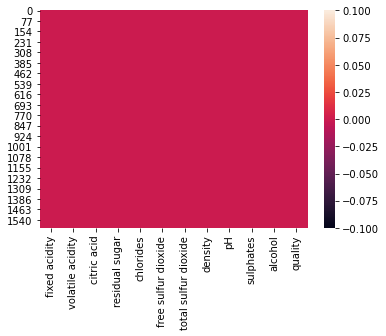

In [6]:
sns.heatmap(df.isna())

Observation- data frame has no missing value 

fixed acidity              AxesSubplot(0.125,0.536818;0.110714x0.343182)
volatile acidity        AxesSubplot(0.257857,0.536818;0.110714x0.343182)
citric acid             AxesSubplot(0.390714,0.536818;0.110714x0.343182)
residual sugar          AxesSubplot(0.523571,0.536818;0.110714x0.343182)
chlorides               AxesSubplot(0.656429,0.536818;0.110714x0.343182)
free sulfur dioxide     AxesSubplot(0.789286,0.536818;0.110714x0.343182)
total sulfur dioxide          AxesSubplot(0.125,0.125;0.110714x0.343182)
density                    AxesSubplot(0.257857,0.125;0.110714x0.343182)
pH                         AxesSubplot(0.390714,0.125;0.110714x0.343182)
sulphates                  AxesSubplot(0.523571,0.125;0.110714x0.343182)
alcohol                    AxesSubplot(0.656429,0.125;0.110714x0.343182)
quality                    AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

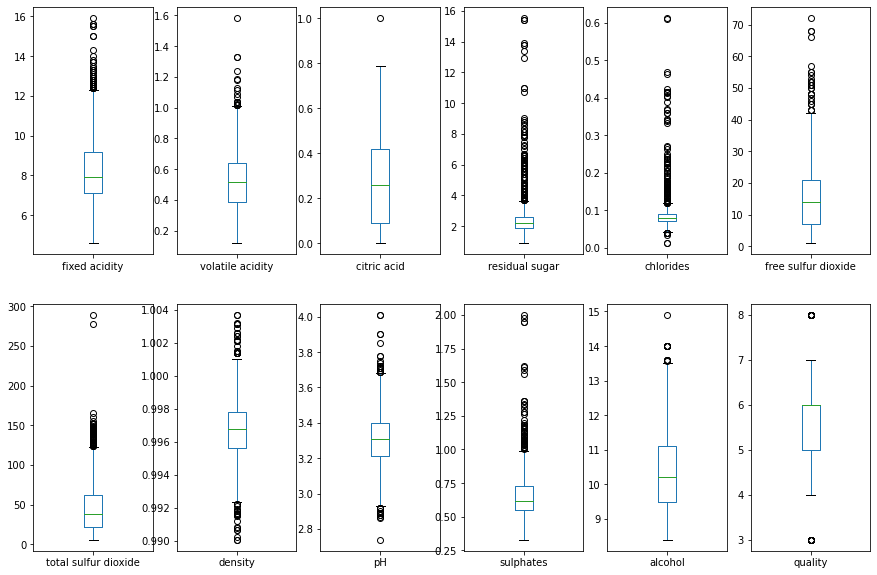

In [7]:
df.plot(kind="box",subplots=True,figsize=(15,10),layout=(2,6))

In [8]:
df["residual sugar"].max()

15.5

In [9]:
df["residual sugar"].min()

0.9

Observation- Outliers  present in most of the columns 

In [10]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

Observation - residual sugar and chloride has most higher  skewness 

Observation-free sulfur dioxide,total sulfur dioxide,sulphates has moderate skewness 

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

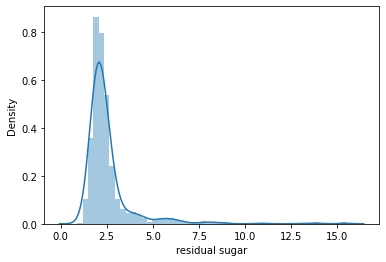

In [11]:
sns.distplot(df["residual sugar"])

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

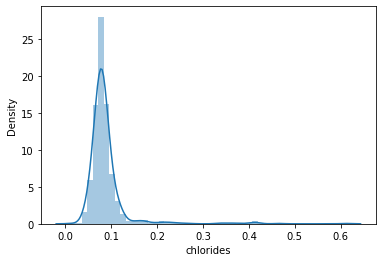

In [12]:
sns.distplot(df["chlorides"])

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

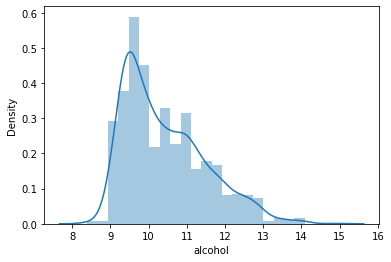

In [13]:
sns.distplot(df["alcohol"])

In [14]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [15]:
df_new=df[(z<3).all(axis=1)]

In [16]:
df_new.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,8.310062,0.522950,0.265382,2.387285,0.081425,15.104755,43.735355,0.996710,3.315934,0.642584,10.421089,5.659545
std,1.646458,0.168531,0.190934,0.862078,0.020966,9.309768,29.441284,0.001716,0.141096,0.129801,1.021588,0.781605
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.500000,4.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.630000,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.400000,0.720000,11.100000,6.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000,8.000000


In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1451 non-null   float64
 1   volatile acidity      1451 non-null   float64
 2   citric acid           1451 non-null   float64
 3   residual sugar        1451 non-null   float64
 4   chlorides             1451 non-null   float64
 5   free sulfur dioxide   1451 non-null   float64
 6   total sulfur dioxide  1451 non-null   float64
 7   density               1451 non-null   float64
 8   pH                    1451 non-null   float64
 9   sulphates             1451 non-null   float64
 10  alcohol               1451 non-null   float64
 11  quality               1451 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 147.4 KB


In [18]:
df_new.shape

(1451, 12)

In [19]:
df.shape

(1599, 12)

In [20]:
#checking the lost data percentage 
round(1451/1599,2)

0.91

Observation - Data lost =9 % 

In [21]:
df_new.skew() 

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

observation -residual sugar ,chlorides and total sulfur dioxide has the skewness


<AxesSubplot:xlabel='chlorides', ylabel='Density'>

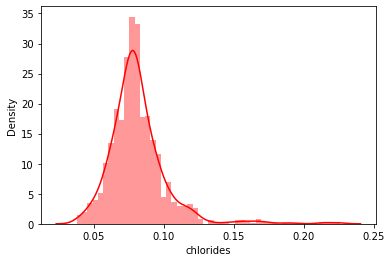

In [22]:
sns.distplot(df_new["chlorides"],color="r")
#checking the skewness in column

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

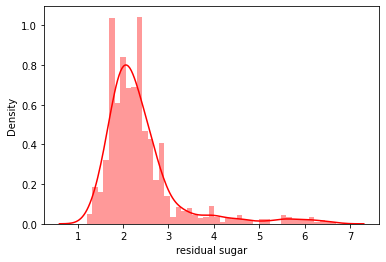

In [23]:
sns.distplot(df_new["residual sugar"],color="r")
#checking the skewness in column

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

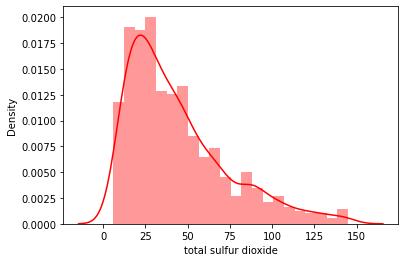

In [24]:
sns.distplot(df_new["total sulfur dioxide"],color="r")
#checking the skewness in column

In [25]:
skewlist=["residual sugar","chlorides","total sulfur dioxide"]

In [26]:
#removing skewness from everycolumn
for i in skewlist:
    df_new[i]=np.log(df_new[i])

df_new["residual sugar"]=np.log(df_new["residual sugar"])
df_new["chlorides"]=np.log(df_new["chlorides"])
df_new["total sulfur dioxide"]=np.log(df_new["total sulfur dioxide"])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

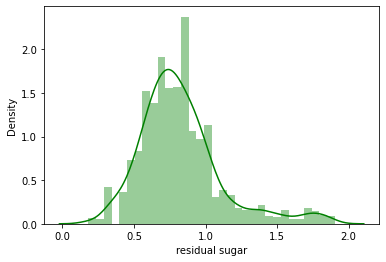

In [27]:
sns.distplot(df_new["residual sugar"] , color="g")
#green represents distribution after skewness treatment,

Observation -a littleskewness is  there 

<AxesSubplot:xlabel='residual sugar', ylabel='quality'>

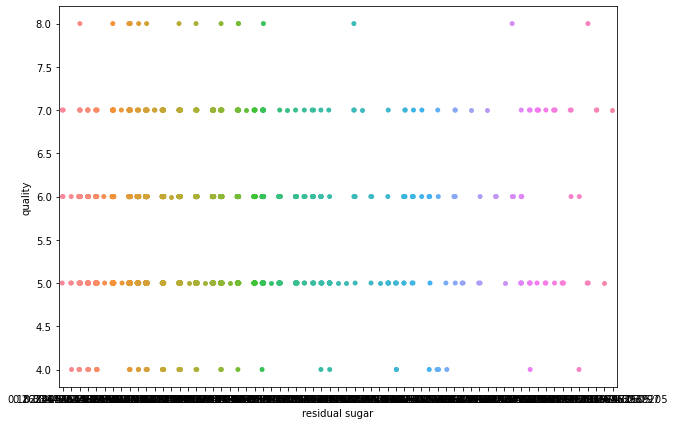

In [28]:
plt.figure(figsize=(10,7))
sns.stripplot(df_new["residual sugar"],df_new["quality"])

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

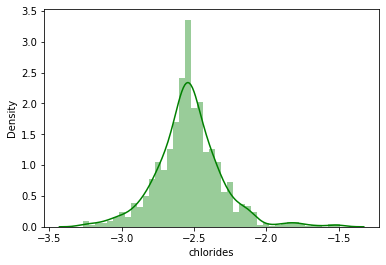

In [29]:
sns.distplot(df_new["chlorides"] , color="g")

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

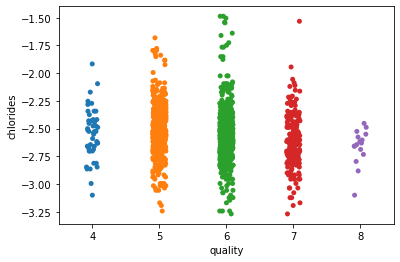

In [30]:

sns.stripplot(df_new["quality"],df_new["chlorides"])

In [31]:
df_new["quality"].unique()

array([5, 6, 7, 4, 8], dtype=int64)

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

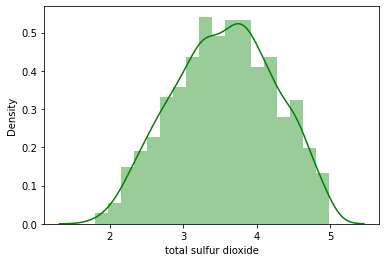

In [32]:
sns.distplot(df_new["total sulfur dioxide"] , color="g")

Observation -total sulfur dioxide has become normalized distribution 

In [33]:
df_new.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          1.227096
chlorides               0.496272
free sulfur dioxide     0.869250
total sulfur dioxide   -0.096908
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

In [34]:
df_new.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,8.310062,0.522950,0.265382,0.822416,-2.535942,15.104755,3.556140,0.996710,3.315934,0.642584,10.421089,5.659545
std,1.646458,0.168531,0.190934,0.290248,0.230449,9.309768,0.682275,0.001716,0.141096,0.129801,1.021588,0.781605
min,5.000000,0.120000,0.000000,0.182322,-3.270169,1.000000,1.791759,0.991500,2.880000,0.330000,8.500000,4.000000
25%,7.100000,0.390000,0.090000,0.641854,-2.659260,7.000000,3.044522,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,0.788457,-2.538307,13.000000,3.583519,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.630000,0.420000,0.955511,-2.419119,21.000000,4.060443,0.997800,3.400000,0.720000,11.100000,6.000000
max,13.500000,1.040000,0.790000,1.902108,-1.487220,47.000000,4.976734,1.002200,3.750000,1.160000,13.600000,8.000000


fixed acidity              AxesSubplot(0.125,0.536818;0.110714x0.343182)
volatile acidity        AxesSubplot(0.257857,0.536818;0.110714x0.343182)
citric acid             AxesSubplot(0.390714,0.536818;0.110714x0.343182)
residual sugar          AxesSubplot(0.523571,0.536818;0.110714x0.343182)
chlorides               AxesSubplot(0.656429,0.536818;0.110714x0.343182)
free sulfur dioxide     AxesSubplot(0.789286,0.536818;0.110714x0.343182)
total sulfur dioxide          AxesSubplot(0.125,0.125;0.110714x0.343182)
density                    AxesSubplot(0.257857,0.125;0.110714x0.343182)
pH                         AxesSubplot(0.390714,0.125;0.110714x0.343182)
sulphates                  AxesSubplot(0.523571,0.125;0.110714x0.343182)
alcohol                    AxesSubplot(0.656429,0.125;0.110714x0.343182)
quality                    AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

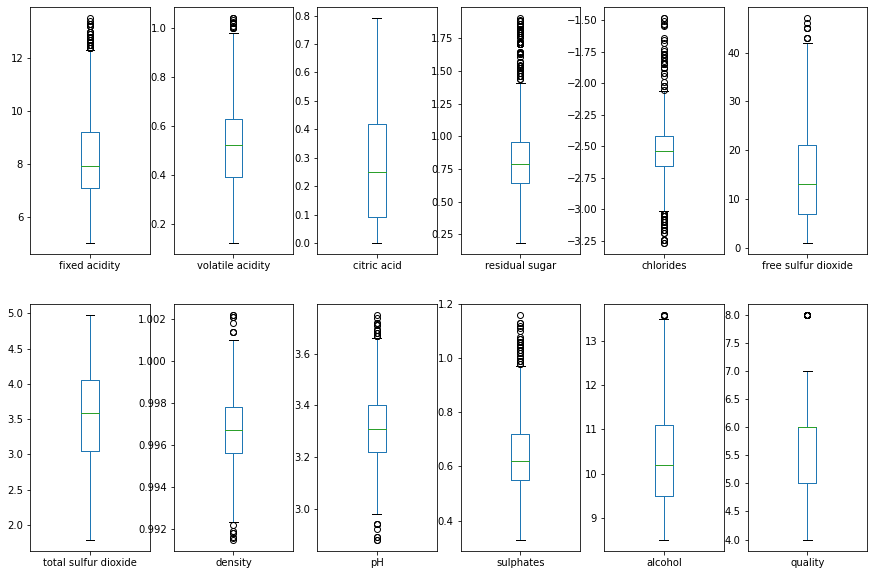

In [35]:
df_new.plot(kind="box",subplots=True,figsize=(15,10),layout=(2,6))

note:as we have saved data under 3std and rows  with skewness aretreated so moving forwards with that refined data 

#### Multivariate EDA 

In [36]:
cor=df_new.corr()

In [37]:
cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.297150,0.698363,0.208097,0.211232,-0.148815,-0.106108,0.659927,-0.705572,0.200371,-0.015114,0.145163
volatile acidity,-0.297150,1.000000,-0.589452,0.031023,0.082052,0.013943,0.106755,-0.004957,0.251343,-0.348126,-0.213213,-0.353443
citric acid,0.698363,-0.589452,1.000000,0.194626,0.100857,-0.074441,-0.030988,0.371729,-0.520311,0.302815,0.168766,0.243999
residual sugar,0.208097,0.031023,0.194626,1.000000,0.189858,0.015462,0.102922,0.385529,-0.079224,0.070049,0.161793,0.056116
chlorides,0.211232,0.082052,0.100857,0.189858,1.000000,-0.029873,0.081987,0.392360,-0.202450,-0.004323,-0.257985,-0.138821
free sulfur dioxide,-0.148815,0.013943,-0.074441,0.015462,-0.029873,1.000000,0.719321,-0.037630,0.108831,0.055956,-0.077993,-0.071202
total sulfur dioxide,-0.106108,0.106755,-0.030988,0.102922,0.081987,0.719321,1.000000,0.143405,0.035718,-0.000904,-0.266695,-0.206877
density,0.659927,-0.004957,0.371729,0.385529,0.392360,-0.037630,0.143405,1.000000,-0.312310,0.129896,-0.468312,-0.167568
pH,-0.705572,0.251343,-0.520311,-0.079224,-0.202450,0.108831,0.035718,-0.312310,1.000000,-0.039082,0.135624,-0.082164
sulphates,0.200371,-0.348126,0.302815,0.070049,-0.004323,0.055956,-0.000904,0.129896,-0.039082,1.000000,0.241636,0.386567


<AxesSubplot:>

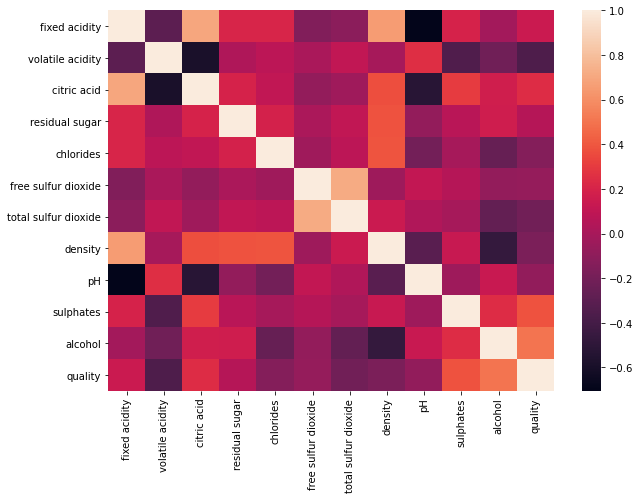

In [38]:
plt.figure(figsize=(10,7))
sns.heatmap(cor)

<AxesSubplot:>

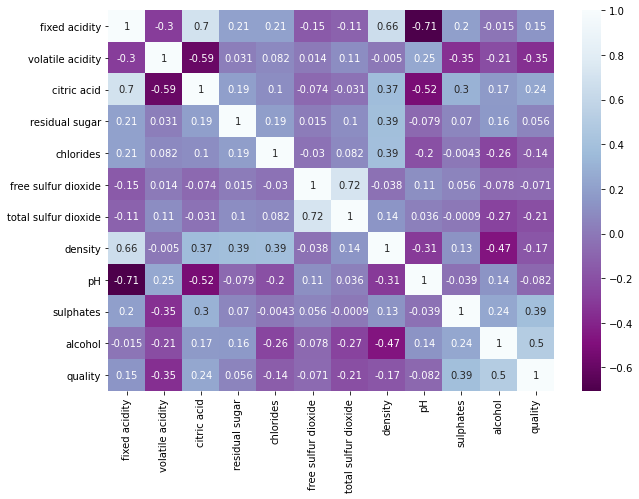

In [39]:
plt.figure(figsize=(10,7))
sns.heatmap(cor , cmap="BuPu_r",annot=True)

observation - no column is highly corelated with the output column( quality)

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
def calc_vif(ds):
    vif=pd.DataFrame()
    vif["variables"]=ds.columns
    vif["VIF FACTOR"]=[variance_inflation_factor (ds.values,i) for i in range (ds.shape[1])]
    return (vif)

In [42]:
calc_vif(df_new)

,variables,VIF FACTOR
0,fixed acidity,87.857448
1,volatile acidity,19.887758
2,citric acid,9.074006
3,residual sugar,10.830112
4,chlorides,145.183066
5,free sulfur dioxide,8.128951
6,total sulfur dioxide,70.486448
7,density,1838.768682
8,pH,1241.348731
9,sulphates,33.963902


Observation- density and ph are highly corelated

observation- 4 of the data data are having high corelation  so we will be using PCA to merge them instead of dropping columns . merging columns will be done after splitting  the data set for better performance 

In [43]:
df_new["density"].min()

0.9915

In [44]:
df_new["density"].max()

1.0022

<AxesSubplot:xlabel='density', ylabel='quality'>

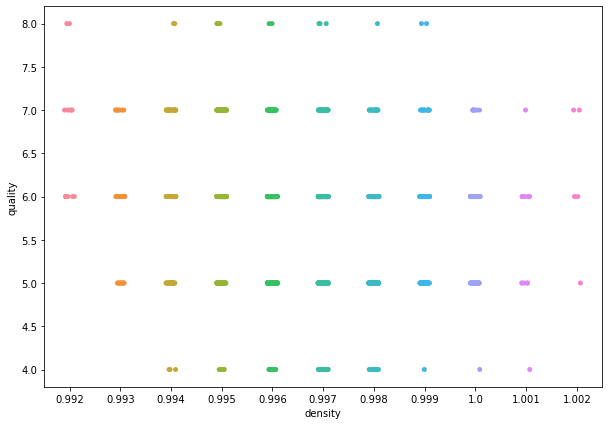

In [45]:
plt.figure(figsize=(10,7))
sns.stripplot(round(df_new["density"],3),round(df_new["quality"],0))

In [46]:
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.641854,-2.577022,11.0,3.526361,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,0.955511,-2.322788,25.0,4.204693,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,0.832909,-2.385967,15.0,3.988984,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,0.641854,-2.590267,17.0,4.094345,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,0.641854,-2.577022,11.0,3.526361,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.693147,-2.407946,32.0,3.784190,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,0.788457,-2.780621,39.0,3.931826,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,0.832909,-2.577022,29.0,3.688879,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,0.693147,-2.590267,32.0,3.784190,0.99547,3.57,0.71,10.2,5


In [47]:
for i in df_new:
    print(i)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


In [48]:
#splitting dataset
x=df_new.drop("quality",axis=1)
y=df_new["quality"]


In [49]:
from sklearn.decomposition import PCA

In [50]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.641854,-2.577022,11.0,3.526361,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,0.955511,-2.322788,25.0,4.204693,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,0.832909,-2.385967,15.0,3.988984,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,0.641854,-2.590267,17.0,4.094345,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,0.641854,-2.577022,11.0,3.526361,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.693147,-2.407946,32.0,3.784190,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,0.788457,-2.780621,39.0,3.931826,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,0.832909,-2.577022,29.0,3.688879,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,0.693147,-2.590267,32.0,3.784190,0.99547,3.57,0.71,10.2


In [51]:
x.shape

(1451, 11)

In [52]:
Pca=PCA(n_components=9)

In [53]:
x=Pca.fit_transform(x)

In [54]:
x.shape

(1451, 9)

In [55]:
x=pd.DataFrame(data=x)

In [56]:
y.shape

(1451,)

In [57]:
y=pd.DataFrame(data=y)

In [58]:
y.shape

(1451, 1)

In [59]:
calc_vif(x)

,variables,VIF FACTOR
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
5,5,1.0
6,6,1.0
7,7,1.0
8,8,1.0


In [60]:
y.shape

(1451, 1)

In [61]:
x.shape

(1451, 9)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [63]:
#saving best random state 
maxAccuracy=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccuracy:
        maxAccuracy=accu
        maxRS=i

print("best accuracy  is ",maxAccuracy, "with random state ",maxRS)

best accuracy  is  0.6651376146788991 with random state  191


In [64]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [65]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [66]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
acc1=classification_report(y_test,pred)
print(acc1)

              precision    recall  f1-score   support

           4       0.33      0.13      0.19        15
           5       0.71      0.73      0.72       188
           6       0.60      0.61      0.61       179
           7       0.40      0.42      0.41        50
           8       0.00      0.00      0.00         4

    accuracy                           0.62       436
   macro avg       0.41      0.38      0.39       436
weighted avg       0.61      0.62      0.61       436



In [67]:
SVCc=SVC()
SVCc.fit(x_train,y_train)
pred=SVCc.predict(x_test)
acc3=classification_report(y_test,pred)
print(acc3)

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        15
           5       0.63      0.83      0.71       188
           6       0.57      0.59      0.58       179
           7       0.00      0.00      0.00        50
           8       0.00      0.00      0.00         4

    accuracy                           0.60       436
   macro avg       0.24      0.28      0.26       436
weighted avg       0.50      0.60      0.55       436



In [68]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
pred=KNN.predict(x_test)
acc3=classification_report(y_test,pred)
print(acc3)

              precision    recall  f1-score   support

           4       0.50      0.07      0.12        15
           5       0.63      0.70      0.66       188
           6       0.55      0.57      0.56       179
           7       0.44      0.32      0.37        50
           8       0.00      0.00      0.00         4

    accuracy                           0.58       436
   macro avg       0.42      0.33      0.34       436
weighted avg       0.56      0.58      0.56       436



In [69]:
from sklearn.model_selection import cross_val_score

### Finding the best model with cross validation 

In [70]:
models=(DTC,KNN,SVCc)
for i in models:
    print (i , cross_val_score(i,x,y,cv=5).mean())

DecisionTreeClassifier() 0.46451712288185804
KNeighborsClassifier() 0.509306789904017
SVC() 0.5472425642848678


In [71]:
 for i in models:
        print ( i , round(cross_val_score(i,x,y,cv=5).mean(),2),"%")

DecisionTreeClassifier() 0.46 %
KNeighborsClassifier() 0.51 %
SVC() 0.55 %


Observation - SVC is having the minimum difference between cross val score and  model accuracy score 

### using hyper parameter 

In [72]:
from sklearn.model_selection import GridSearchCV

In [77]:
parameters={"kernel":["linear","poly","rbf"],
            "decision_function_shape":["ovr","ovo"],
            "C":np.arange(1.0,30.0),
           "coef0":np.arange(1.0,3.0)}

In [78]:
GCV=GridSearchCV(SVC(),parameters,cv=5)

In [79]:
SVCc.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [80]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29.]),
                         'coef0': array([1., 2.]),
                         'decision_function_shape': ['ovr', 'ovo'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [81]:
GCV.best_params_

{'C': 18.0, 'coef0': 1.0, 'decision_function_shape': 'ovr', 'kernel': 'poly'}

### final model selection 

In [86]:
Wine_final_model=SVC(C=18.0, coef0= 1.0, decision_function_shape= 'ovr', kernel= 'poly')
Wine_final_model.fit(x_train ,y_train)
pred=Wine_final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print (acc*100)

63.53211009174312


Observation- With  best params , model is performing better  .

### Saving model 

In [87]:
import joblib

In [88]:
joblib.dump(Wine_final_model,"Wine_final_model.pkl")

['Wine_final_model.pkl']